In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
data = pd.read_csv('r_dataisbeautiful_posts.csv', sep=",")
data.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,g0l1o6,[OC] Website about covid-19 pandemic stats wit...,1,muddymind,NaN,moderator,0.0,[],1586791506,https://www.reddit.com/r/dataisbeautiful/comme...,3.0,False
1,g0kxzc,Dynamic timeline of the founding of major Euro...,1,[deleted],NaN,deleted,0.0,[],1586791184,https://www.reddit.com/r/dataisbeautiful/comme...,0.0,False
2,g0kwbp,"Despite more than four weeks to complete it, I...",251,jamaisvu99,OC: 3,NaN,0.0,[],1586791045,https://www.reddit.com/r/dataisbeautiful/comme...,25.0,False
3,g0ktji,[OC] Reported Coronavirus Tests per million as...,24,AAA786786,OC: 2,NaN,0.0,[],1586790800,https://www.reddit.com/r/dataisbeautiful/comme...,18.0,False
4,g0kiyr,[OC] House M.D.-IMDB rating of episodes,9,MrButterDucky,OC: 1,moderator,0.0,[],1586789902,https://www.reddit.com/r/dataisbeautiful/comme...,8.0,False


In [16]:
# проверим есть ли пропущенные значения
data.isnull().sum()

id                          0
title                       0
score                       0
author                      0
author_flair_text        3608
removed_by               2618
total_awards_received       0
awarders                    0
created_utc                 0
full_link                   0
num_comments                1
over_18                     1
dtype: int64

In [25]:
# Удаление строки, содержащих пустые значения
data_new_1 = data.dropna(axis=0,how='any',subset=['num_comments','over_18'])
(data.shape, data_new_1.shape)

((4504, 12), (4503, 12))

Нам было известно, что значения num_comments, over_18 были пропущены по 1 разу. После чего мы удалили строку, в кторой было пропущено как и num_comments, так и over_18.

In [26]:
# Удаление колонок, содержащих пустые значения
data_new_2 = data_new_1.dropna(axis=1, how='any')
(data_new_1.shape, data_new_2.shape)

((4503, 12), (4503, 10))

In [27]:
# проверим есть ли пропущенные значения
data_new_2.isnull().sum()

id                       0
title                    0
score                    0
author                   0
total_awards_received    0
awarders                 0
created_utc              0
full_link                0
num_comments             0
over_18                  0
dtype: int64

In [28]:
data_new_2.head()

,id,title,score,author,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,g0l1o6,[OC] Website about covid-19 pandemic stats wit...,1,muddymind,0.0,[],1586791506,https://www.reddit.com/r/dataisbeautiful/comme...,3.0,False
1,g0kxzc,Dynamic timeline of the founding of major Euro...,1,[deleted],0.0,[],1586791184,https://www.reddit.com/r/dataisbeautiful/comme...,0.0,False
2,g0kwbp,"Despite more than four weeks to complete it, I...",251,jamaisvu99,0.0,[],1586791045,https://www.reddit.com/r/dataisbeautiful/comme...,25.0,False
3,g0ktji,[OC] Reported Coronavirus Tests per million as...,24,AAA786786,0.0,[],1586790800,https://www.reddit.com/r/dataisbeautiful/comme...,18.0,False
4,g0kiyr,[OC] House M.D.-IMDB rating of episodes,9,MrButterDucky,0.0,[],1586789902,https://www.reddit.com/r/dataisbeautiful/comme...,8.0,False


In [0]:
from sklearn.datasets import load_boston

def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [41]:
data = make_dataframe(load_boston)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
pd.get_dummies(data, columns = ['RAD']).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['TAX']])

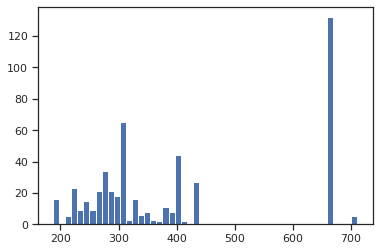

In [63]:
plt.hist(data['TAX'], 50)
plt.show()

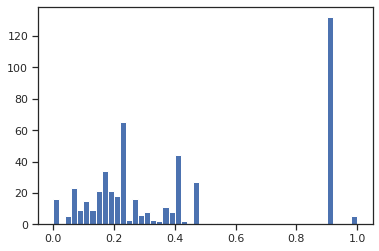

In [64]:
plt.hist(sc1_data, 50)
plt.show()